In [1]:
import sys,array
import matplotlib.pyplot as plt
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math
import pandas as pd

%matplotlib inline

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.12.1 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [9]:
tot_on = 540817
tot_off = 377481 #218466 #379202
tot_bnbcos = 270000 #384200 #101600

scale_intime = 10.279 
int_per_1e20POT = 99035.2 
dataPOT = 0.495 * (tot_on) / 567157 
mcbnbcos_POT = float(tot_bnbcos)/int_per_1e20POT 
off_to_on = 1.23 * (400675./tot_off) * (tot_on/567157.)

mc_to_onbeam = dataPOT/mcbnbcos_POT
print "POTS : ", dataPOT, mcbnbcos_POT 
print "MC to OnBeam : ", mc_to_onbeam
print "Off to OnBeam: ",off_to_on

POTS :  0.47201112743 2.72630337496
MC to OnBeam :  0.17313228299
Off to OnBeam:  1.24494251452


In [10]:
def makePlots(var,var_min,var_max,nbins=20,xlabel=''):

    x_on, y_on = np.histogram(df0[var].values,bins=nbins,range=(var_min,var_max))
    x_off, y_off = np.histogram(df1[var].values,bins=nbins,range=(var_min,var_max))
    x_bnb, y_bnb = np.histogram(df2[var].values,bins=nbins,range=(var_min,var_max))

    bins = (y_off[:-1] + y_off[1:])/2
    bin_width = bins[1]-bins[0]

    bnbcos_m = x_bnb * mc_to_onbeam 
    off_min_on_m = x_on - x_off*off_to_on

    off_min_on_m = [off_min_on_m[i] if off_min_on_m[i] >=0 else 0 for i in xrange(len(off_min_on_m)) ]

    err_on = np.sqrt(x_on)
    err_off = np.sqrt(x_off)
    err_data = np.sqrt(err_on * err_on + err_off * err_off)
    err_mc = np.sqrt(bnbcos_m)

    fig,ax = plt.subplots(figsize=(8,6))
    plt.bar(bins - bin_width/2,err_mc*2,bin_width,bottom = bnbcos_m - err_mc/2.,\
        alpha=0.5, color='r', linewidth=0,label='Monte Carlo')
    plt.errorbar(bins,off_min_on_m,yerr=err_data,fmt='ko',label='On - OffBeam',markersize=6,lw=1.5)
    plt.grid(True)
    #handles,labels = ax.get_legend_handles_labels()
    plt.xlim(var_min,var_max)
    plt.xlabel(xlabel,fontsize=16,weight='bold')
    plt.legend(loc=0) #handles=handles[::-1],fontsize=12)
    plt.ylim(0)
    plt.savefig('Plots/LL_%s_%s'%(stage,var))
    

In [11]:
def makeMCPlots(var,var_min,var_max,bins=20,xlabel=''):

    x_bnb, y_bnb = np.histogram(df2[var].values,bins=nbins,range=(var_min,var_max))

    bins = (y_bnb[:-1] + y_bnb[1:])/2
    bin_width = bins[1]-bins[0]
    err_mc = np.sqrt(x_bnb)

    fig,ax = plt.subplots(figsize=(8,6))
    plt.errorbar(bins,x_bnb,yerr=err_mc,fmt='ko',label='MCBNBCos',markersize=6,lw=1.5)
    plt.grid(True)
    plt.xlim(var_min,var_max)
    plt.xlabel(xlabel,fontsize=16,weight='bold')
    plt.legend(loc=0) #handles=handles[::-1],fontsize=12)
    plt.ylim(0)
    plt.savefig('Plots/LL_%s_%s'%(stage,var))
    

In [12]:
def make2DPlots(var1,var2,xmin,xmax,ymin,ymax,bins=20,xlabel='',ylabel=''):

    # var2 goes on y axis
    H, xedges, yedges = np.histogram2d(df0[var2].values,df0[var1].values,bins=bins)
    Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero

    fig = plt.figure(figsize=(8,6))
    plt.pcolormesh(yedges,xedges,Hmasked)
    plt.grid(True)
    plt.colorbar()
    plt.xlabel(xlabel,fontsize=16,weight='bold')
    plt.ylabel(ylabel,fontsize=16,weight='bold')
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.savefig('Plots/LL_%s_%s_%s_2Donbeam'%(stage,var1,var2))
   
    # var2 goes on y axis
    H, xedges, yedges = np.histogram2d(df1[var2].values,df1[var1].values,bins=bins)
    Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero

    fig = plt.figure(figsize=(8,6))
    plt.pcolormesh(yedges,xedges,Hmasked)
    plt.grid(True)
    plt.colorbar()
    plt.xlabel(xlabel,fontsize=16,weight='bold')
    plt.ylabel(ylabel,fontsize=16,weight='bold')
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.savefig('Plots/LL_%s_%s_%s_2Doffbeam'%(stage,var1,var2))

    
    H, xedges, yedges = np.histogram2d(df2[var2].values,df2[var1].values,bins=bins)
    Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero

    fig = plt.figure(figsize=(8,6))
    plt.pcolormesh(yedges,xedges,Hmasked)
    plt.grid(True)
    plt.colorbar()
    plt.xlabel(xlabel,fontsize=16,weight='bold')
    plt.ylabel(ylabel,fontsize=16,weight='bold')
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.savefig('Plots/LL_%s_%s_%s_2Dmcbnbcos'%(stage,var1,var2))


In [22]:
# Tracks and Vertices
stage='sel2'
f_root = 'Files/SelectionII_ccpi0_all_samples.root' 

f = rn.root2array(f_root, treename='tree')
df = pd.DataFrame(f)

In [23]:
df0 = df.query('sample == 0')
df1 = df.query('sample == 1')
df2 = df.query('sample == 2')

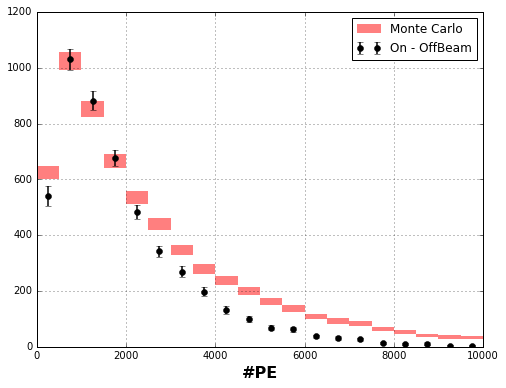

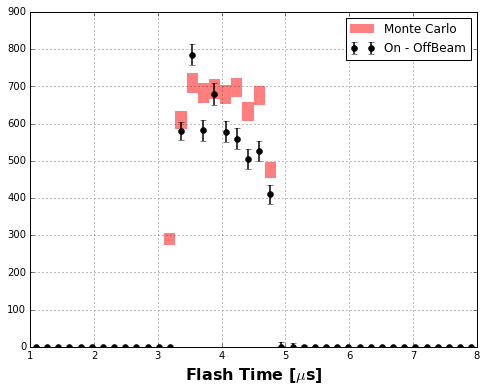

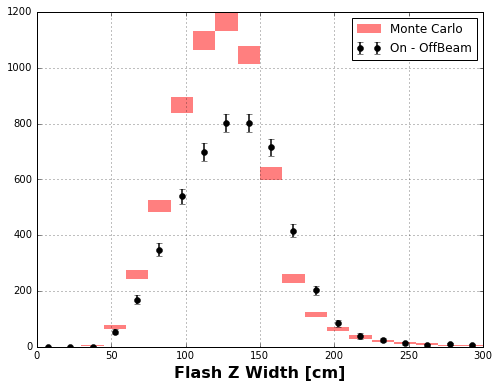

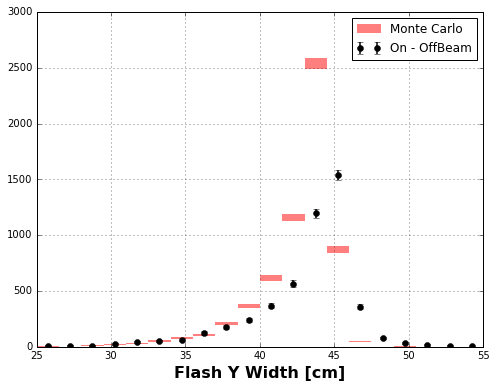

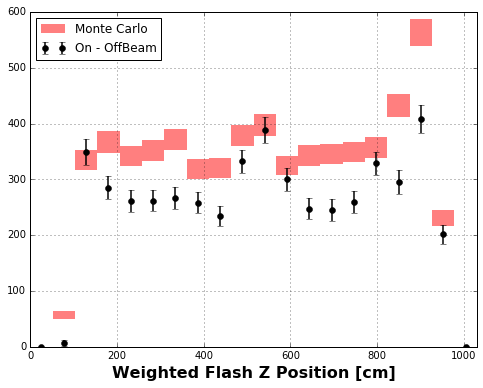

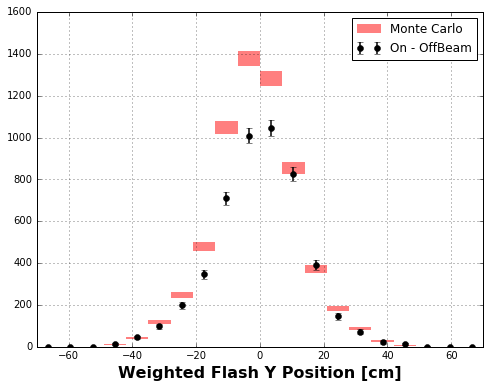

In [24]:
# Track Plots
makePlots('flash_npe',0,10000,xlabel='#PE')
makePlots('flash_t',1,8,nbins=40,xlabel='Flash Time [$\\mu$s]')
makePlots('flash_wid_z',0,300,xlabel='Flash Z Width [cm]')
makePlots('flash_wid_y',25,55,xlabel='Flash Y Width [cm]')
makePlots('flash_z',0,1030,xlabel='Weighted Flash Z Position [cm]')
makePlots('flash_y',-70,70,xlabel='Weighted Flash Y Position [cm]')


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41783 entries, 0 to 41782
Data columns (total 50 columns):
run_ahack          41783 non-null int32
subrun_ahack       41783 non-null int32
event_ahack        41783 non-null int32
entry_ahack        41783 non-null int32
sample             41783 non-null int32
mult               41783 non-null int32
mc_energy          41783 non-null float32
mc_vtx_x           41783 non-null float32
mc_vtx_y           41783 non-null float32
mc_vtx_z           41783 non-null float32
mc_len             41783 non-null float32
reco_vtx_x         41783 non-null float32
reco_vtx_y         41783 non-null float32
reco_vtx_z         41783 non-null float32
vtx_diff           41783 non-null float32
len                41783 non-null float32
start_x            41783 non-null float32
start_y            41783 non-null float32
start_z            41783 non-null float32
end_x              41783 non-null float32
end_y              41783 non-null float32
end_z              41

In [26]:
df0 = df.query('sample == 0 & passes_pi0cuts == True')
df1 = df.query('sample == 1 & passes_pi0cuts == True')
df2 = df.query('sample == 2 & passes_pi0cuts == True')

In [27]:
print df0.shape, df1.shape, df2.shape

(117, 50) (5, 50) (433, 50)


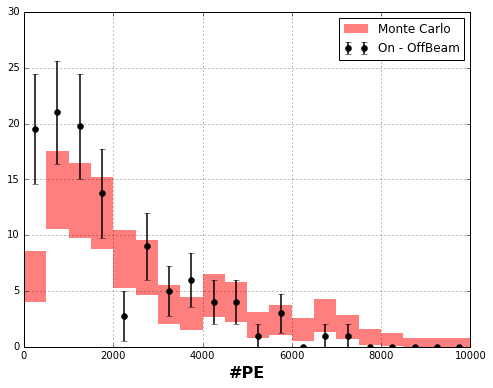

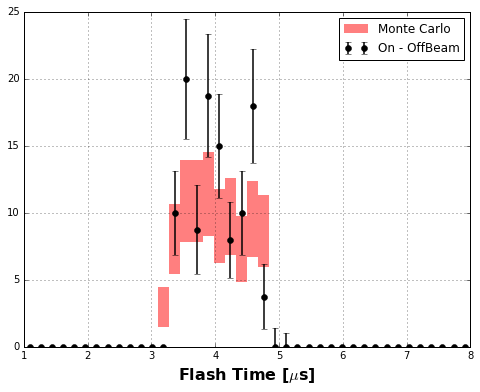

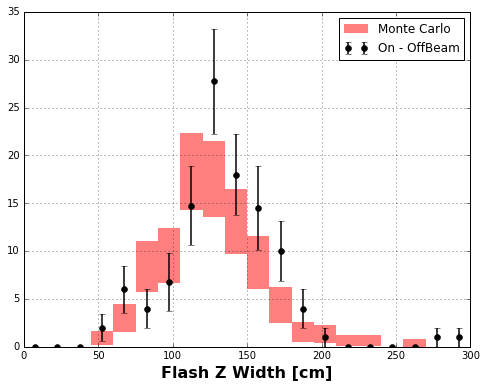

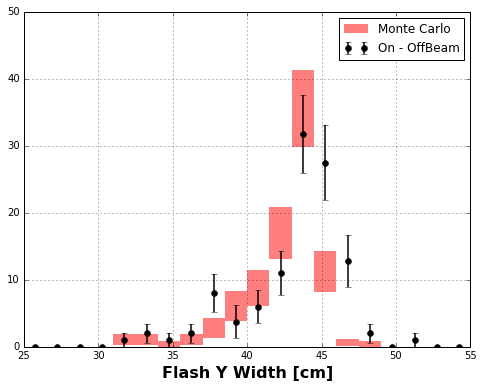

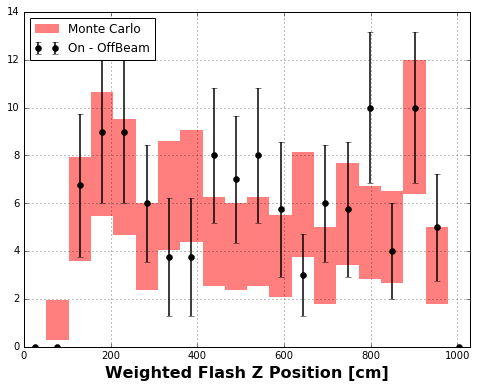

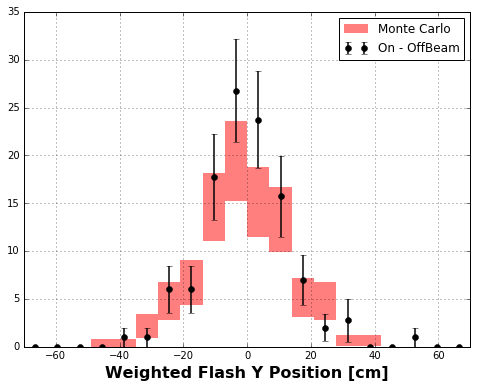

In [28]:
# Track Plots
stage='pi0_needstoberedone'

makePlots('flash_npe',0,10000,xlabel='#PE')
makePlots('flash_t',1,8,nbins=40,xlabel='Flash Time [$\\mu$s]')
makePlots('flash_wid_z',0,300,xlabel='Flash Z Width [cm]')
makePlots('flash_wid_y',25,55,xlabel='Flash Y Width [cm]')
makePlots('flash_z',0,1030,xlabel='Weighted Flash Z Position [cm]')
makePlots('flash_y',-70,70,xlabel='Weighted Flash Y Position [cm]')
